In [1]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

# Find EE PM Event

In [2]:
ee_source_timestamp_df = QueryBuilder().with_pm() \
    .with_duration(t_start='2018-12-12 17:21:00.000000', duration=[(100, 's'), (100, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='EE') \
    .event_query().df

ee_source_timestamp_df

source            timestamp
0  RR17.RB.A12  1544631694896000000
1  UA23.RB.A12  1544631695395000000

# Find FGC PM Event

In [7]:
pc_source_timestamp_df = QueryBuilder().with_pm() \
    .with_duration(t_start='2018-12-12 17:21:00.000000', duration=[(100, 's'), (100, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='PC') \
    .event_query().df

pc_source_timestamp_df

source            timestamp
0  RPTE.UA23.RB.A12  1544631694840000000

# Query EE PM Voltage

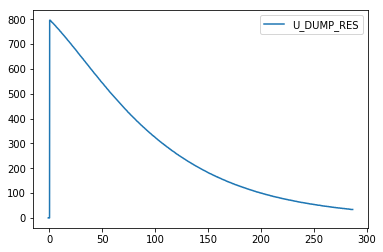

In [18]:
u_dump_res_df = QueryBuilder().with_pm() \
    .with_timestamp(ee_source_timestamp_df.loc[0, 'timestamp']) \
    .with_query_parameters(system='QPS', source=ee_source_timestamp_df.loc[0, 'source'], className='DQAMSNRB', signal='U_DUMP_RES') \
    .signal_query() \
    .synchronize_time(pc_source_timestamp_df.loc[0, 'timestamp']) \
    .convert_index_to_sec() \
    .dfs[0]
u_dump_res_df.astype(int).plot()

# Query ST_PWR_PERM

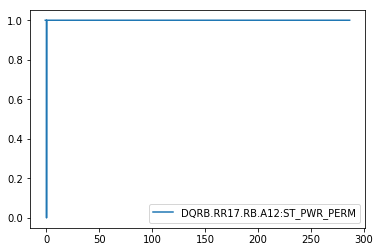

In [16]:
rb_st_pwr_perm_df = QueryBuilder().with_pm() \
    .with_timestamp(ee_source_timestamp_df.loc[0, 'timestamp']) \
    .with_query_parameters(system='QPS', source=ee_source_timestamp_df.loc[0, 'source'], className='DQAMSNRB', signal='DQRB.RR17.RB.A12:ST_PWR_PERM') \
    .signal_query() \
    .synchronize_time(pc_source_timestamp_df.loc[0, 'timestamp']) \
    .convert_index_to_sec() \
    .dfs[0]
rb_st_pwr_perm_df.astype(int).plot()

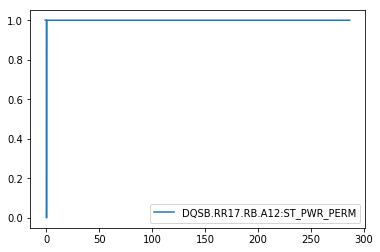

In [17]:
sb_st_pwr_perm_df = QueryBuilder().with_pm() \
    .with_timestamp(ee_source_timestamp_df.loc[0, 'timestamp']) \
    .with_query_parameters(system='QPS', source=ee_source_timestamp_df.loc[0, 'source'], className='DQAMSNRB', signal='DQSB.RR17.RB.A12:ST_PWR_PERM') \
    .signal_query() \
    .synchronize_time(pc_source_timestamp_df.loc[0, 'timestamp']) \
    .convert_index_to_sec() \
    .dfs[0]
sb_st_pwr_perm_df.astype(int).plot()

# Query EE PM Digital Signals

In [35]:
ee_digital_dfs = QueryBuilder().with_pm() \
    .with_timestamp(ee_source_timestamp_df.loc[1, 'timestamp']) \
    .with_query_parameters(system='QPS', source=ee_source_timestamp_df.loc[1, 'source'], className='DQAMSNRB', signal=['ST_REC_FPA1', 'ST_REC_FPA2']) \
    .signal_query() \
    .synchronize_time(pc_source_timestamp_df.loc[0, 'timestamp']) \
    .convert_index_to_sec() \
    .dfs

# Plot digital signals

(0, 1)

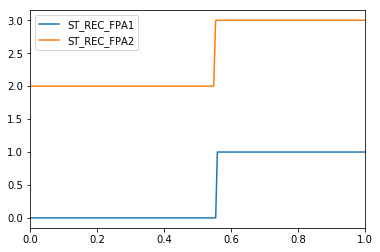

In [47]:
fig, ax = plt.subplots()
for index, el in enumerate(ee_digital_dfs):
    el.astype(int).add(2*index).plot(ax=ax)

ax.set_xlim([0, 1])

# Save digital signals as csv

In [38]:
for ee_digital_df in ee_digital_dfs:
    ee_digital_df.to_csv(ee_digital_df.columns[0] + '.csv')

# Query PC PM Current

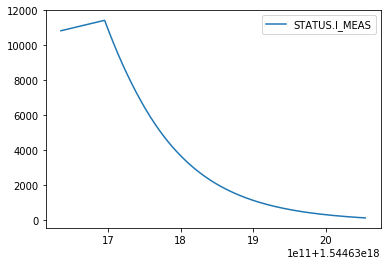

In [8]:
i_meas_df = QueryBuilder().with_pm() \
    .with_timestamp(1544631694840000000) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='PC', signal='I_MEAS') \
    .signal_query().dfs[0]

i_meas_df.plot()